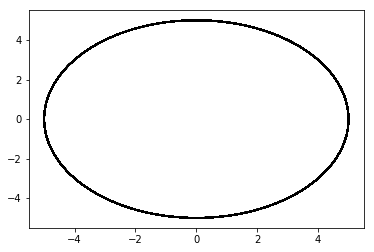

In [9]:
import numpy as np
import matplotlib.pyplot as plt
plt.ion()

Nsteps = 1000000  #the total number of time steps
h = 1e-3  #time stepping interval value

#creating arrays to store the values of p and q
q = np.zeros(Nsteps)
p = np.zeros(Nsteps)

#variables to store temporary values during calculations
q_temp = 0
p_temp = 0

#initial value of p
p[0] = 5.0

#shifting the p to half time steps by an initial forward euler.
p_temp = p[0] - 0.5*h*q[0]
p[0] = p_temp

for i in range(1,Nsteps):
    #computing the q's 
    q_temp = q[i-1] + h*p[i-1]
    q[i] = q_temp
    
    #computing the p's
    p_temp = p[i-1] - h*q[i]
    p[i] = p_temp
    
plt.plot(q,p,'-k') #a line plot

q_lp = q
p_lp = p

## RK4

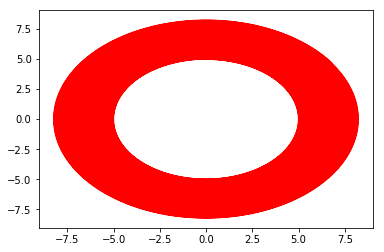

In [10]:
import numpy as np
import matplotlib.pyplot as plt
plt.ion()

Nsteps = 1000000  #the total number of time steps
h = 1e-3  #time stepping interval value

#creating arrays to store the values of p and q
q = np.zeros(Nsteps)
p = np.zeros(Nsteps)

#initial value of p
p[0] = 5.0

#variables to store the intermediate forces
qk1 = 0
qk2 = 0
qk3 = 0
qk4 = 0

qp1 = 0
qp2 = 0
qp3 = 0
qp4 = 0

for i in range(1,Nsteps):
    qk1 = h*p[i-1]
    qk2 = h*(p[i-1] - 0.5*h*q[i-1])
    qk3 = qk2
    qk4 = h*(p[i-1] - h*q[i-1])
    
    pk1 = -h*q[i-1]
    pk2 = -h*(q[i-1] - 0.5*h*p[i-1])
    pk3 = pk2
    pk4 = -h*(q[i-1] - h*p[i-1])
    
    q[i] = q[i-1] + (1./6)*(qk1 + 2*qk2 + 2*qk3 + qk4)
    p[i] = p[i-1] + (1./6)*(pk1 + 2*pk2 + 2*pk3 + pk4)
    
plt.plot(q,p,'-r')

q_rk = q
p_rk = p

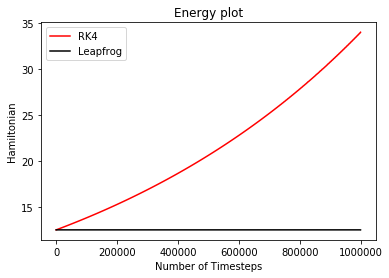

In [16]:
E_rk = 0.5*(p_rk**2 + q_rk**2)
E_lp = 0.5*(p_lp**2 + q_lp**2)

plt.plot(E_rk,'-r',label='RK4')
plt.plot(E_lp,'-k',label='Leapfrog')

plt.title('Energy plot')
plt.ylabel('Hamiltonian')
plt.xlabel('Number of Timesteps')
plt.legend()